In [1]:
import sys
sys.path.insert(0, './src/')

from table_extractor import TableExtractor
from card_extractor import CardExtractor
from card_classifier import CardClassifier
from chip_counter import ChipCounter

import os
import PIL.Image
import time

from evaluation_utils import eval_listof_games, eval_listof_games_per_category , debug_listof_games, save_results , load_results
import pandas as pd

import numpy as np
from collections import defaultdict


%load_ext autoreload
%autoreload 2

In [2]:
def process_image(image, plot=False) -> dict:
    """
    Process image and return information. To return the value of the cards we use 
    the following format: {number}{color}. Where 
        - color is either (D)imanond, (H)eart, (S)pade, (C)lub
        - number is either 2-10, (J)ack, (Q)ueen, (K)ing. A(s).
            
    Parameters
    ----------
    image:
        Input image to process

    Returns
    -------
    results:
        - T1 (str): String code of the first card of the flop (far left) 
        - T2 (str): String code of the second card of the flop
        - T3 (str): String code of the third card of the flop
        - T4 (str): String code of the turn
        - T5 (str): String code of the river
        - P11 (str or int): String code of player 1 card 1. Should be 0 if player 1 is not Playing.
        - P12 (str or int): String code of player 1 card 2. Should be 0 if player 1 is not Playing.
        - P21 (str or int): String code of player 2 card 1. Should be 0 if player 2 is not Playing.
        - P22 (str or int): String code of player 2 card 2. Should be 0 if player 2 is not Playing.
        - P31 (str or int): String code of player 3 card 1. Should be 0 if player 3 is not Playing.
        - P32 (str or int): String code of player 3 card 2. Should be 0 if player 3 is not Playing.
        - P41 (str or int): String code of player 4 card 1. Should be 0 if player 4 is not Playing.
        - P42 (str or int): String code of player 4 card 2. Should be 0 if player 4 is not Playing.
        - CR (int): Number of (r)ed chips in the pot
        - CG (int): Number of (g)reen chips in the pot
        - CB (int): Number of (b)lue chips in the pot
        - CK (int): Number of blac(k) chips in the pot
        - CW (int): Number of (w)hite chips in the pot
        
    Examples
    --------
    - QH: Queen of hearths
    - 10S: 10 of spades
    - AC: Ace f clubs

    """
    def def_value():
        return "0"
      
    results = defaultdict(def_value)
    
    image = np.array(image)
    
    # Extract table
    table_img = TableExtractor.extract_table(image, plot=plot)
    
    # Extract cards
    card_extractor = CardExtractor(table_img)
    
    
    # Classify bottom cards
    table_card_keys = ["T1", "T2", "T3", "T4", "T5"]
    table_cards = card_extractor.extract_table_cards(plot=plot)
    CardClassifier.classify_cards(table_cards, table_card_keys, results, can_use_both_corners=True, plot=plot)
    
    players = ["P1", "P2", "P3", "P4"]
    for player in players:
        if (plot):
            print(player)
        c1, c2 = card_extractor.extract_player_cards(player, plot=plot)
        
        first_card_name = player + "1"
        second_card_name = player + "2"

        is_face_down = False
        if (type(c1) != type(None)):
            is_face_down |= CardClassifier.is_card_face_down(c1, plot=plot)
            if(not is_face_down):
                results[first_card_name], _ = CardClassifier.classify_card(c1, can_use_both_corners=False, plot =plot)
                
        if (type(c2) != type(None)):
            is_face_down |= CardClassifier.is_card_face_down(c2, plot=plot)
            if(not is_face_down):
                results[second_card_name], _ = CardClassifier.classify_card(c2, can_use_both_corners=False, plot=plot)
        if(is_face_down):
            results[first_card_name] = "0"
            results[second_card_name] = "0"
            
    # Chips
    ChipCounter.count_chips(table_img, results, plot=plot)
    
    return results

# Evaluation

In [3]:
path_data = "data/train"
group_id = 0

Size of trainset:
	28
Game 12


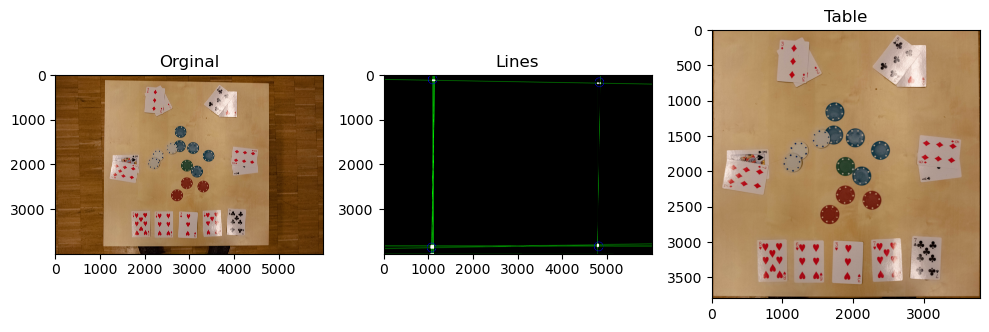

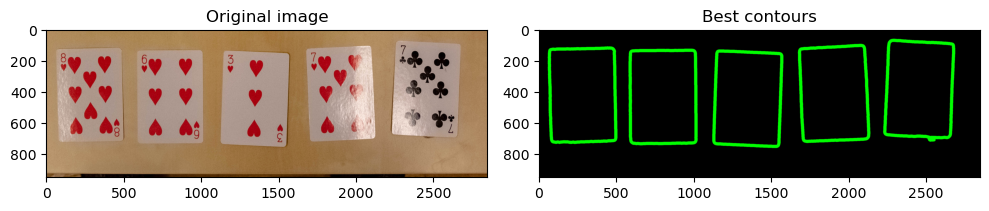

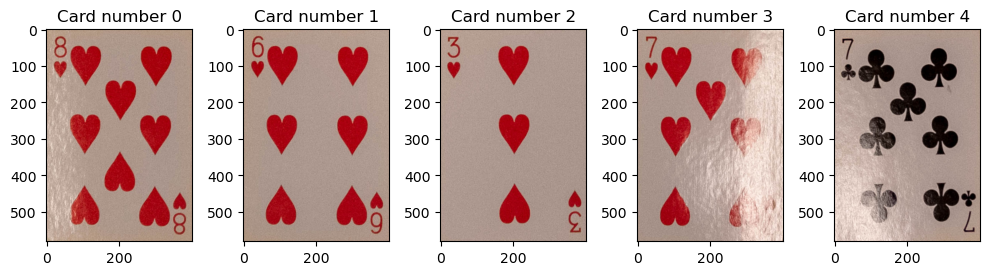

Predicted: 8H with score char:0.903337169159954, symbol:0.9092645654250239
Predicted: 6H with score char:0.9213197969543148, symbol:0.9420849420849421
Predicted: 3H with score char:0.8990182328190743, symbol:0.9401544401544402
Predicted: 7H with score char:0.8178053830227743, symbol:0.9373191899710704
Predicted: 7C with score char:0.8970917225950783, symbol:0.9040667361835245
P1
Extracted player card with height pipeline: is top card:True
Extracted player card with height pipeline: is top card:False


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


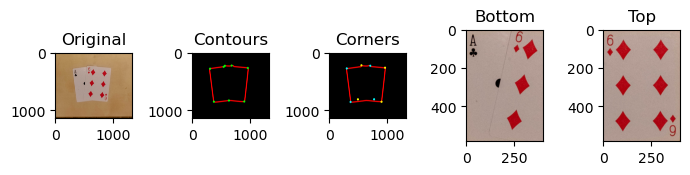

Predicted: AC with score char:0.5750658472344161, symbol:0.9031925849639547
Predicted: 6D with score char:0.7830188679245284, symbol:0.9551282051282052
P2
Extracted player card with height pipeline: is top card:False
Extracted player card with width pipeline: is top card:False
Extracted player card with width pipeline: is top card:True


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


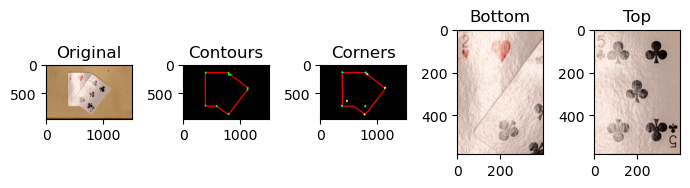

FACE DOWN
P3
Extracted player card with width pipeline: is top card:False
Extracted player card with width pipeline: is top card:False
Detected side lead to corners outisde the image


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


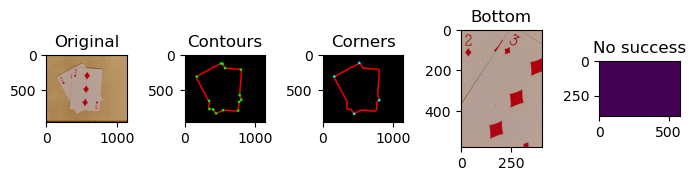

Extracted player card with width pipeline: is top card:False
Extracted player card with width pipeline: is top card:False
Detected side lead to corners outisde the image
Extracted player card with width pipeline: is top card:True


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


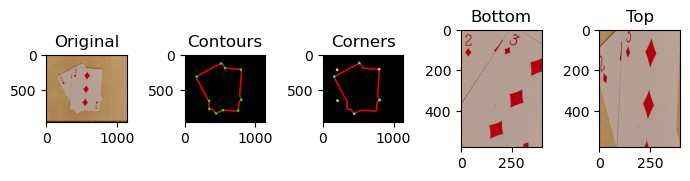

Predicted: 2D with score char:0.8335724533715926, symbol:0.9277864992150706
Predicted: AD with score char:0.26976906927921623, symbol:0.1761744966442953
P4
Extracted player card with height pipeline: is top card:False
Extracted player card with height pipeline: is top card:True


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


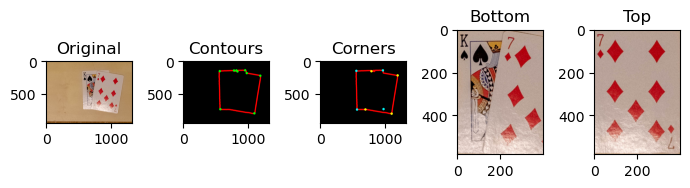

Predicted: KS with score char:0.8928571428571429, symbol:0.8942917547568711
Predicted: 7D with score char:0.8020618556701031, symbol:0.9456


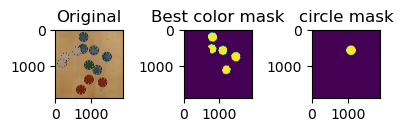

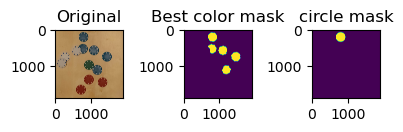

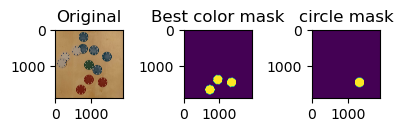

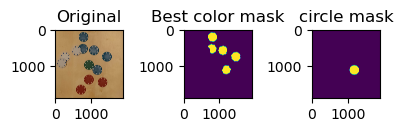

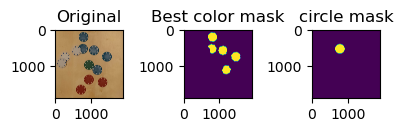

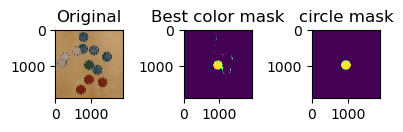

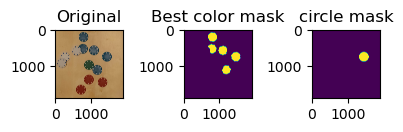

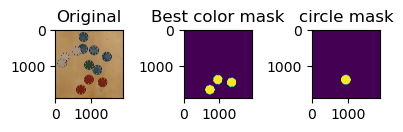

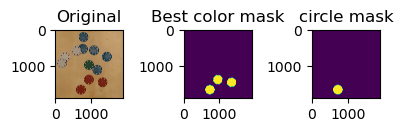

Warning circle with no thresholded color inside
Warning circle with no thresholded color inside


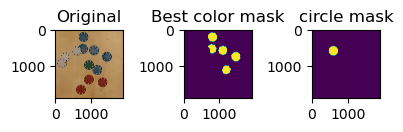

Predicted game 12 in 24.99433398246765s


In [11]:
# load train size dataset
train_size = np.loadtxt(os.path.join(path_data, "train_size.txt")).astype(int)
print("Size of trainset:\n\t{}".format(train_size))

# Load images from folder
game_results = {}

# Evaluate training images
games_id = [12]#range(28)


for i in games_id :
    print(f"Game {i}")

    start_time = time.time()
    file = os.path.join(path_data, f"train_{str(i).zfill(2)}.jpg")
    # open the image
    im = PIL.Image.open(file)
    # Process the image
    results = process_image(image=im, plot= True)
    # Append result to array
    game_results[i] = results
    
    print(f"Predicted game {i} in {time.time() - start_time}s")
    #print("Prediciton game:\n\t{}: {}".format(0, game_results[i])) #overlay

# Saving results
file_results = save_results(results=game_results, groupid=group_id)

In [5]:
# Checking the results were loaded correctly
loaded_results = load_results(file_results)
print(loaded_results.keys())

game_labels = pd.read_csv('data/train/train_labels.csv')
game_labels = game_labels.fillna('0')

dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27'])


In [6]:
eval_listof_games_per_category(game_results , game_labels , game_id = games_id)

Game 0 results
Num: 1.0
Suits: 1.0
Chips:1.0
________________________________________
Game 1 results
Num: 1.0
Suits: 1.0
Chips:1.0
________________________________________
Game 2 results
Num: 1.0
Suits: 0.9230769230769231
Chips:1.0
________________________________________
Game 3 results
Num: 0.9230769230769231
Suits: 1.0
Chips:1.0
________________________________________
Game 4 results
Num: 0.6923076923076923
Suits: 0.46153846153846156
Chips:0.875
________________________________________
Game 5 results
Num: 0.9230769230769231
Suits: 0.8461538461538461
Chips:1.0
________________________________________
Game 6 results
Num: 0.9230769230769231
Suits: 0.6153846153846154
Chips:1.0
________________________________________
Game 7 results
Num: 1.0
Suits: 1.0
Chips:1.0
________________________________________
Game 8 results
Num: 1.0
Suits: 0.9230769230769231
Chips:1.0
________________________________________
Game 9 results
Num: 0.8461538461538461
Suits: 0.8461538461538461
Chips:1.0
_____________

In [7]:
#Average SCORE num =  0.9505494505494506
#Average SCORE suits =  0.925824175824176
#Average SCORE chips =  0.9320510838367982

In [10]:
eval_listof_games( game_results , game_labels , game_id = games_id)

Game 0 results
Estimated game
['2C', '6H', '8D', 'JC', 'JS', '2H', '4S', 'KS', 'QS', 'KD', '5S', '7H', '8C', 1, 1, 1, 1, 1]
True game
['2C' '6H' '8D' 'JC' 'JS' '2H' '4S' 'KS' 'QS' 'KD' '5S' '7H' '8C' 1 1 1 1
 1]


             	scores
Card number 	1.0 %
Card suit   	1.0 %
Chips       	1.0 %


FINAL score 	1.0 %
________________________________________
Game 1 results
Estimated game
['9H', '8C', '2H', '4C', 'JS', '0', '0', '3C', 'KH', 'KD', '2D', 'QS', '3S', 2, 0, 1, 0, 1]
True game
['9H' '8C' '2H' '4C' 'JS' '0' '0' '3C' 'KH' 'KD' '2D' 'QS' '3S' 2 0 1 0 1]


             	scores
Card number 	1.0 %
Card suit   	1.0 %
Chips       	1.0 %


FINAL score 	1.0 %
________________________________________
Game 2 results
Estimated game
['9D', '3D', '4C', '6D', '2H', '7H', 'QD', '10S', '10S', '5C', '4S', '2S', '4H', 0, 0, 8, 1, 0]
True game
['9D' '3D' '4C' '6D' '2H' '7H' 'QD' '10S' '10C' '5C' '4S' '2S' '4H' 0 0 8
 1 0]


             	scores
Card number 	1.0 %
Card suit   	0.92 %
Chips       	1.0 %


0.9527243589743589

Solved: 0, 1, 7, 10, 15, 20, 24
Difficult: 4, 6, 12, 18, 23

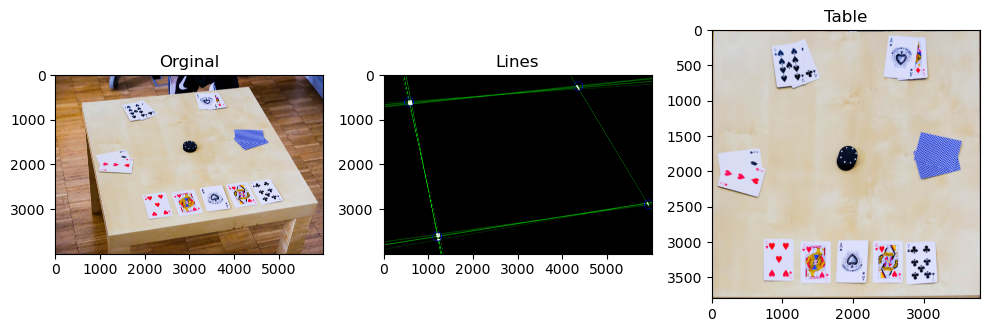

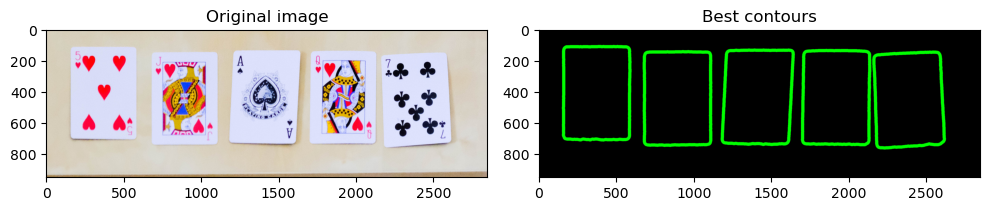

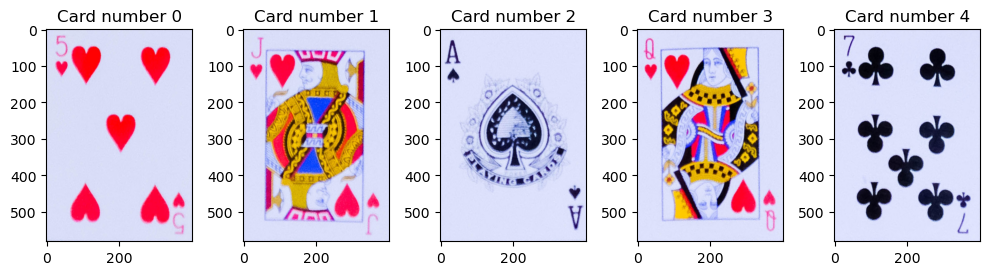

Predicted: 5H with score char:0.6763888888888889, symbol:0.8216106014271152
Predicted: JH with score char:0.8046875, symbol:0.8267074413863404
Predicted: AS with score char:0.7555350553505535, symbol:0.659016393442623
Predicted: QH with score char:0.8297619047619048, symbol:0.8757637474541752
Predicted: 7C with score char:0.7633928571428571, symbol:0.8646616541353384
P1


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Extracted player card with height pipeline: is top card:True
Extracted player card with height pipeline: is top card:False


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


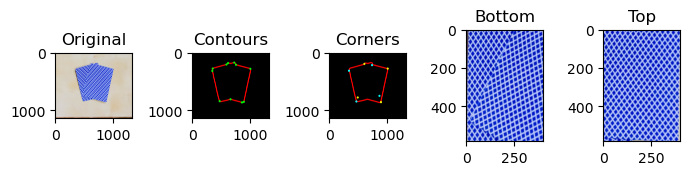

FACE DOWN
FACE DOWN
P2
Extracted player card with width pipeline: is top card:False
Extracted player card with height pipeline: is top card:True


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


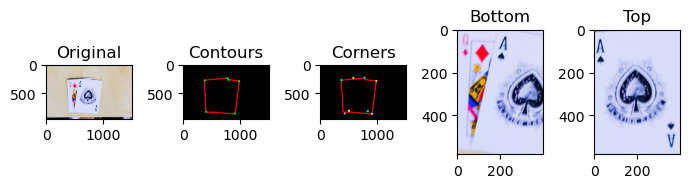

Predicted: QD with score char:0.5543933054393305, symbol:0.62248322147651
Predicted: AS with score char:0.6535008976660682, symbol:0.4988962472406181
P3
Extracted player card with height pipeline: is top card:False
Extracted player card with height pipeline: is top card:True


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


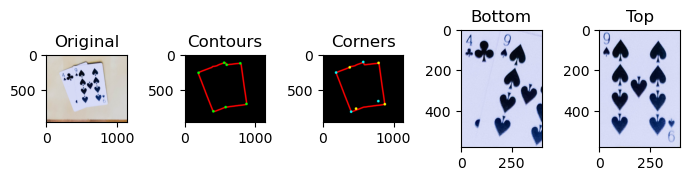

Predicted: 4S with score char:0.5555555555555556, symbol:0.7247899159663865
Predicted: 9S with score char:0.32774869109947646, symbol:0.7752442996742671
P4
Extracted player card with height pipeline: is top card:True


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Extracted player card with height pipeline: is top card:False


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


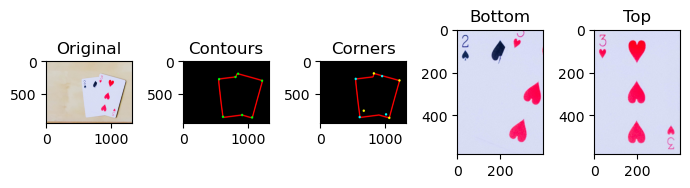

Predicted: 2S with score char:0.7720125786163522, symbol:0.8170865279299014
Predicted: 3H with score char:0.7293447293447294, symbol:0.883130081300813


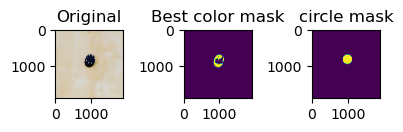

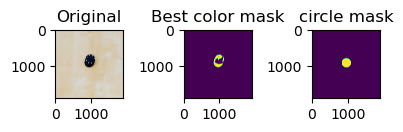

In [9]:
# open the image
im = PIL.Image.open("./data/image_setup/ultimate_test.jpg")
# Process the image
results = process_image(image=im, plot= True)